In [1]:
import tensorflow as tf
import os

In [2]:
os.listdir('test_images')

['glock19']

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data'

In [6]:
image_exts=['jpeg','jpg','bmp','png']

In [7]:
os.listdir(os.path.join(data_dir,'glock19'))

['037-Glock-19-pistol.jpg',
 '0F384513-331F-44BB-9814-204846D5076B_1_105_c.jpeg',
 '123f75f0-246d-43cc-aa54-bb0073a825fc-full36x25_GunfoundatCentralHighSchoolimageviaHCSO.png',
 '19_v_26_2.jpg',
 '2021-09-29-15-51-48-0b0d6f5233f4448cb98fc95e4737eb0fjpg-wmark-wmark.jpg',
 '220px-Glock_19_Generation_4-removebg.png',
 '30dr35hjt8py.jpg',
 '360_F_428764226_IeB3kcX2rvz4riBaEPICyZnniM6VLrbU.jpg',
 '5-reasons-glock-19-great-carry-gun-001-1200x800.jpg',
 '5-reasons-glock-19-great-carry-gun-004-1200x800.jpg',
 '6.-Glock-G19-Gen-4-1024x678.jpg',
 '61SYOUaoEWL._SL1200_.jpg',
 '63314bca5557d5f52750e6e0128ae2989865473f7a118.jpg',
 '764503572197__08587.1575691572.jpg',
 '912-0008-e-glock-19-ghost-2.jpg',
 '99BE6FE4-722C-4144-BB9F-B89484411922.jpeg',
 'All-Tested-Glock-Triggers-1024x710.jpg',
 'B012C132_191214DA_CANON-videoSixteenByNine3000.jpg',
 'Bear-Cut-FDE-Tarpon-GLD-Barrel-Final-1.png',
 'cerakoted-graphite-black-and-gold-two-tone-glock-19.jpg',
 'Constitution-Glock-19-2-scaled.jpg',
 'cz-title

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path= os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            

In [9]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 647 files belonging to 4 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
batch[0].shape

(32, 256, 256, 3)

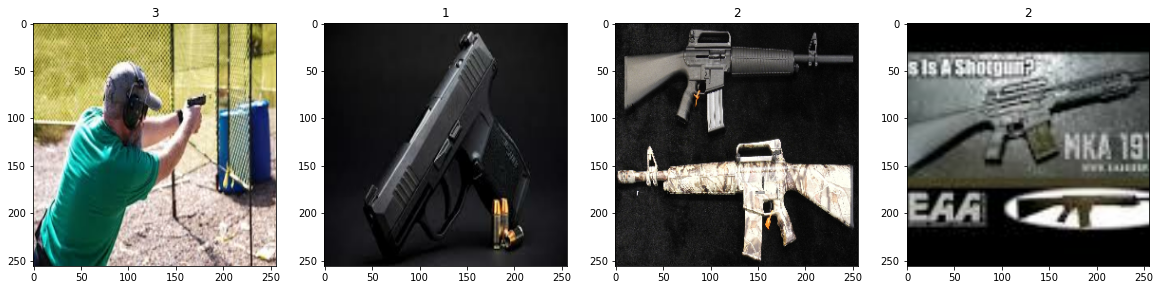

In [15]:
flg,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
scaled = batch[0]/255

In [17]:
scaled.min()

0.0

In [18]:
data = data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [19]:
data.as_numpy_iterator().next()[0].max()

1.0

In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch=scaled_iterator.next()

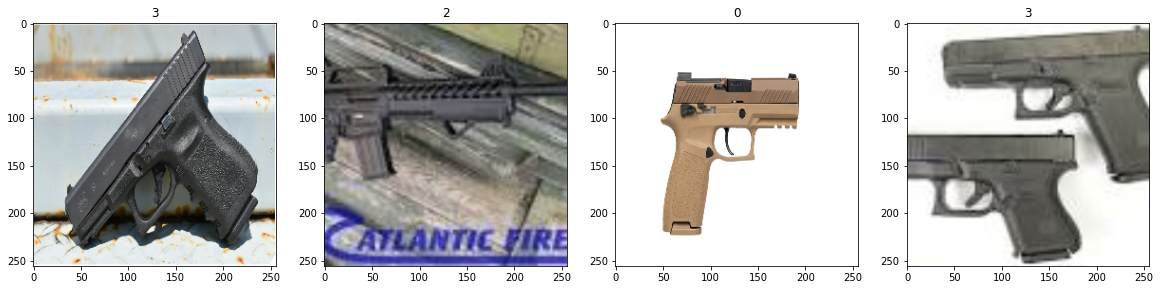

In [22]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [24]:
train_size+val_size+test_size

21

In [25]:
len(data)

21

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16,(3,3),1,activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 55s 3s/step - loss: -203.1913 - accuracy: 0.2299 - val_loss: -727.7321 - val_accuracy: 0.2562
Epoch 2/20
14/14 [==============================] - 38s 2s/step - loss: -5601.5381 - accuracy: 0.2299 - val_loss: -19069.4648 - val_accuracy: 0.2313
Epoch 3/20
14/14 [==============================] - 40s 3s/step - loss: -63300.7617 - accuracy: 0.2210 - val_loss: -163485.4844 - val_accuracy: 0.2375
Epoch 4/20
14/14 [==============================] - 36s 2s/step - loss: -460910.0938 - accuracy: 0.2254 - val_loss: -828258.2500 - val_accuracy: 0.2500
Epoch 5/20
14/14 [==============================] - 40s 3s/step - loss: -2069850.2500 - accuracy: 0.2344 - val_loss: -4634142.0000 - val_accuracy: 0.2375
Epoch 6/20
14/14 [==============================] - 47s 3s/step - loss: -7303890.5000 - accuracy: 0.2277 - val_loss: -14778824.0000 - val_accuracy: 0.2313
Epoch 7/20
14/14 [==============================] - 40s 2s/step - loss: -22277792.0000 - accu

In [ ]:
fig =plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy}')

In [ ]:
img = cv2.imread('0F384513-331F-44BB-9814-204846D5076B_1_105_c.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

In [ ]:
resize =tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

In [ ]:
np.expand_dims(resize, 0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [ ]:
yhat

In [ ]:
if yhat<1.5:
    print(f'Predected class is gun')
else:
    print(f'Predected class shotgun')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','guntest.h5'))

In [ ]:
new_model = load_model(os.path.join('models','guntest.h5'))

In [ ]:
yhat_new=new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhat_new>1.5:
    print(f'Predected class is shotgun')
elif yhat_new<1.5 && yhat_new>0.5:
    print(f'Predected class gun')
else:
    print(f'Predected class p230')